In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [2]:
#####################
# Training data     # X & Y
#####################

Loading training dataset...



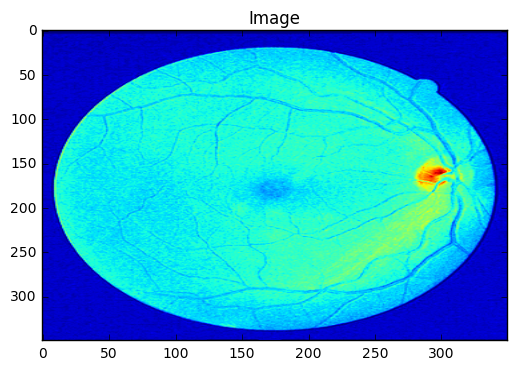

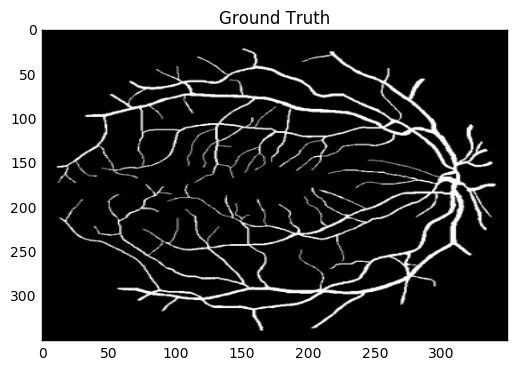

In [3]:
#DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
DATA_ROOT = "D:/Cesare/tf_UNET_int/NEW350/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#
plt.imshow(X_data[19,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.title("Image")
plt.show()
plt.imshow(Y_data[19,..., ], aspect="auto",cmap='gray')
plt.title("Ground Truth")
plt.show()

In [4]:
#####################
# Standardization   # X
#####################

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_data_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_data[i,...,0])
    X_data_std.append(img_std)

#
X_data_std=np.array(X_data_std)
#

C:\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
print("TRAIN data  shape (Scaled):", X_data_std.shape)

print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

TRAIN data  shape (Scaled): (20, 350, 350)
TRAIN data  shape: (20, 350, 350, 3)
TRAIN label shape: (20, 350, 350)


In [7]:
#####################
# Testing  data     # X & Y
#####################

Loading testing dataset...



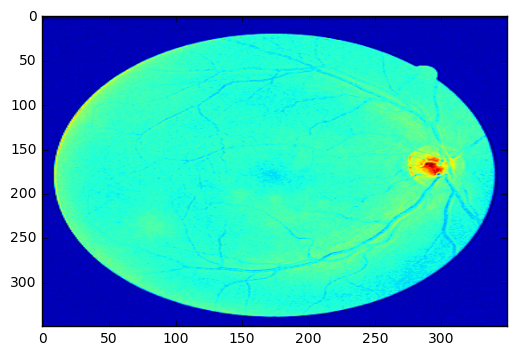

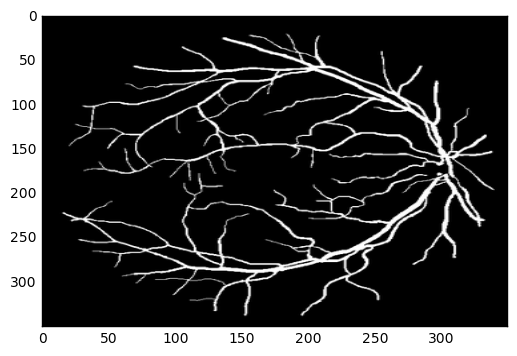

In [8]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#
plt.imshow(X_test[19,...,2], aspect="auto")   
plt.show()
plt.imshow(Y_test[19,..., ], aspect="auto",cmap='gray')
plt.show()

In [9]:
#####################
# Standardization   # X
#####################

In [10]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_test_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_test[i,...,0])
    X_test_std.append(img_std)

#
X_test_std=np.array(X_test_std)
#

C:\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
print("TEST data  shape (Scaled):", X_test_std.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TEST data  shape (Scaled): (20, 350, 350)
TEST  data  shape: (20, 350, 350, 3)
TEST  label shape: (20, 350, 350)


In [12]:
#print(X_test[14])

In [13]:
X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.bool)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.bool)

In [14]:
X_data_std = X_data_std.astype(np.float32)

X_test_std = X_test_std.astype(np.float32)

In [15]:
#######################
# Training parameters #
#######################
training_iters = 32
epochs = 300
dropout = 0.75
display_step = 10

In [16]:
#data_provider = image_util.SimpleDataProvider(X_data_std, Y_data, channels=3, n_class=2)
data_provider = image_util.SimpleDataProvider(X_data, Y_data, channels=3, n_class=2)

In [17]:
print(data_provider.channels)
print(data_provider.n_class)

3
2


In [18]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

2017-11-25 15:23:21,892 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [19]:
path = trainer.train(data_provider, "./out", training_iters=training_iters, epochs=epochs, dropout=dropout, display_step=display_step)


2017-11-25 15:32:36,058 Removing 'D:\Cesare\tf_UNET_int\prediction'
2017-11-25 15:32:36,059 Removing 'D:\Cesare\tf_UNET_int\out'
2017-11-25 15:32:36,059 Allocating 'D:\Cesare\tf_UNET_int\prediction'
2017-11-25 15:32:36,061 Allocating 'D:\Cesare\tf_UNET_int\out'
2017-11-25 15:33:33,574 Verification error= 27.0%, loss= 0.6745
2017-11-25 15:33:50,823 Start optimization
2017-11-25 15:34:05,591 Iter 0, Minibatch Loss= 0.6315, Training Accuracy= 0.6992, Minibatch error= 30.1%
2017-11-25 15:34:28,005 Iter 10, Minibatch Loss= 0.5839, Training Accuracy= 0.7248, Minibatch error= 27.5%
2017-11-25 15:34:50,541 Iter 20, Minibatch Loss= 0.5586, Training Accuracy= 0.7248, Minibatch error= 27.5%
2017-11-25 15:35:11,227 Iter 30, Minibatch Loss= 0.5629, Training Accuracy= 0.6992, Minibatch error= 30.1%
2017-11-25 15:35:13,255 Epoch 0, Average loss: 0.5804, learning rate: 0.0010
2017-11-25 15:35:14,690 Verification error= 27.0%, loss= 0.5539
2017-11-25 15:35:37,828 Iter 40, Minibatch Loss= 0.5584, Traini

In [20]:
####################
# Testing result   # Un-scaled
####################

In [21]:
test_generator =image_util.SimpleDataProvider(X_test, Y_test, channels=3, n_class=2)

In [22]:
X_test, Y_test = test_generator(1)

In [23]:
prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-27 08:37:28,998 Restoring parameters from ./out/model.cpkt
2017-11-27 08:37:39,405 Model restored from file: ./out/model.cpkt


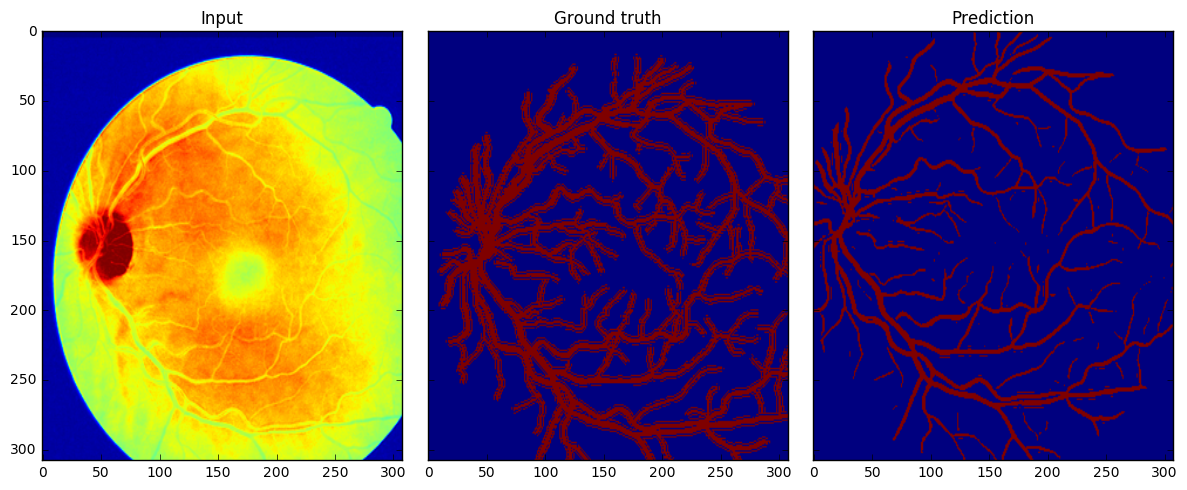

In [24]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [25]:
print("PREDICTION",prediction.shape)

PREDICTION (1, 308, 308, 2)


In [26]:
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Testing error rate: 13.23%


In [27]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
#util.save_image(img, "/Users/cesare.chung/int/retina_problem_Testing.png")
util.save_image(img, "D:/Cesare/tf_UNET_int/retina_problem.png")

In [28]:
####################
# Training result  # Un-scaled
####################

In [29]:
X_test, Y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-27 08:39:49,183 Restoring parameters from ./out/model.cpkt
2017-11-27 08:39:55,642 Model restored from file: ./out/model.cpkt


In [30]:
print("Training error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Training error rate: 8.37%


In [31]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
#util.save_image(img, "/Users/cesare.chung/int/retina_problem_Training.png")
util.save_image(img, "D:/Cesare/tf_UNET_int/retina_problem.png")

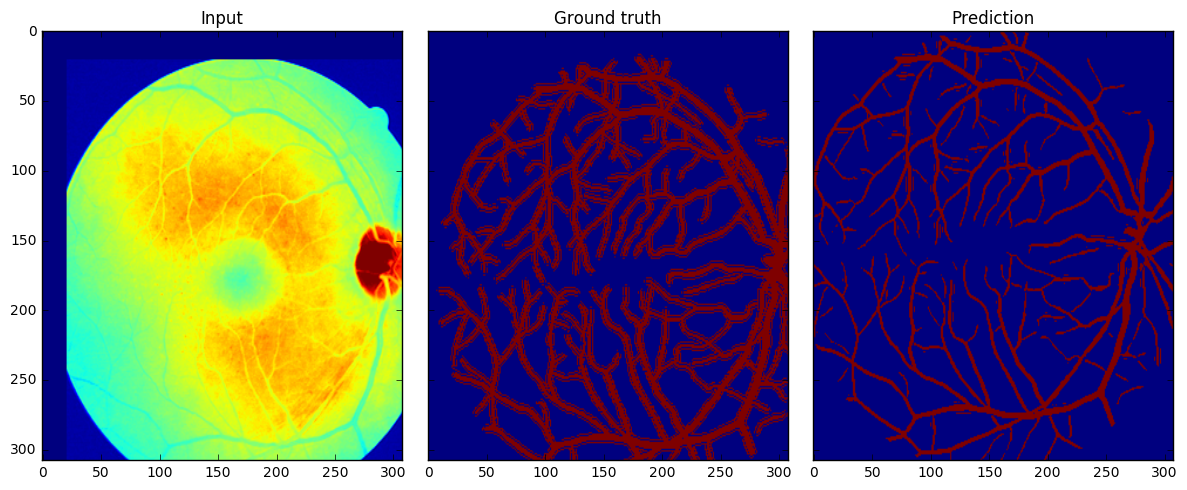

In [32]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()